In [ ]:
# default_exp dataloaderes

## Dataloaders

> Details

In [ ]:
#hide
from fastcore.test import *
from nbdev.showdoc import *

# Imports

In [ ]:
#hide
#export
from fastai.vision.all import *

from omegaconf import DictConfig, OmegaConf
from hydra import initialize_config_module, compose
from hydra.utils import instantiate, call

In [ ]:
#export
def get_config(config_module: str=None, config_name: str='config'):
    # hack to check if `initialize` was called
    import flax_experiments.config as config
    from hydra.core.global_hydra import GlobalHydra
    if not GlobalHydra.instance().is_initialized():
        cfg_module = config_module or config.__name__
        initialize_config_module(config_module=cfg_module, version_base=None)
    return compose(config_name)

In [ ]:
#export
def get_dataloader(cfg: DictConfig):
    path = untar_data(getattr(URLs,cfg.name))
    item_tmfs = instantiate(cfg.item_tfms)
    batch_tmfs = call(cfg.batch_tfms)
    dls = ImageDataLoaders.from_folder(
        path, valid=cfg.valid_name, 
        item_tfms=item_tmfs,
        batch_tfms=batch_tmfs)
    return dls


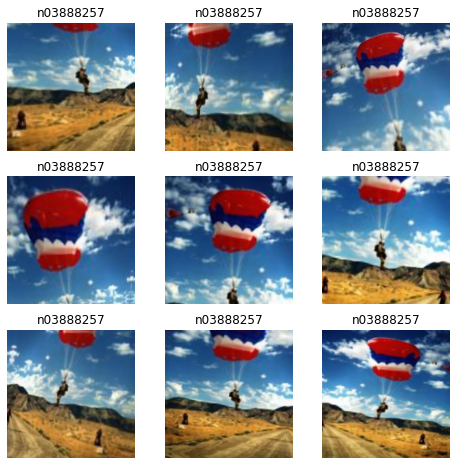

In [ ]:
cfg = get_config()
dls = get_dataloader(cfg.dataset)    
dls.show_batch(figsize=(8,8), unique=True)

In [ ]:
b = dls.train.one_batch()
b[0].shape, b[1].shape

(torch.Size([64, 3, 128, 128]), torch.Size([64]))

In [ ]:
from fastai.vision.augment import aug_transforms

aug_transforms

<function fastai.vision.augment.aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)>

In [ ]:
cfg = get_config()
print(OmegaConf.to_yaml(cfg))

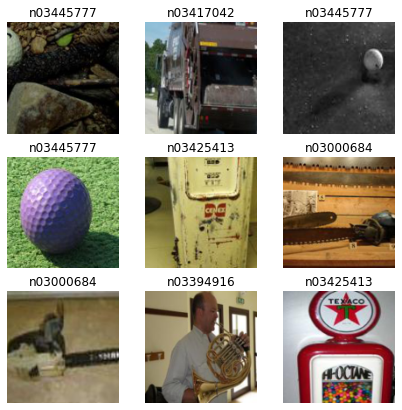

In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.IMAGENETTE_160)
dls = ImageDataLoaders.from_folder(path, valid='val', 
    item_tfms=RandomResizedCrop(128, min_scale=.35))
dls.show_batch(figsize=(7,7))

In [ ]:
dls.train, dls.valid

(<fastai.data.core.TfmdDL at 0x7f0789355720>,
 <fastai.data.core.TfmdDL at 0x7f0752b32c50>)